In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Explore Data

In [4]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Data Preprocessing

In [12]:
df=df.drop('Unnamed: 0' , axis='columns')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Visualization

In [18]:
import seaborn as sns

In [19]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

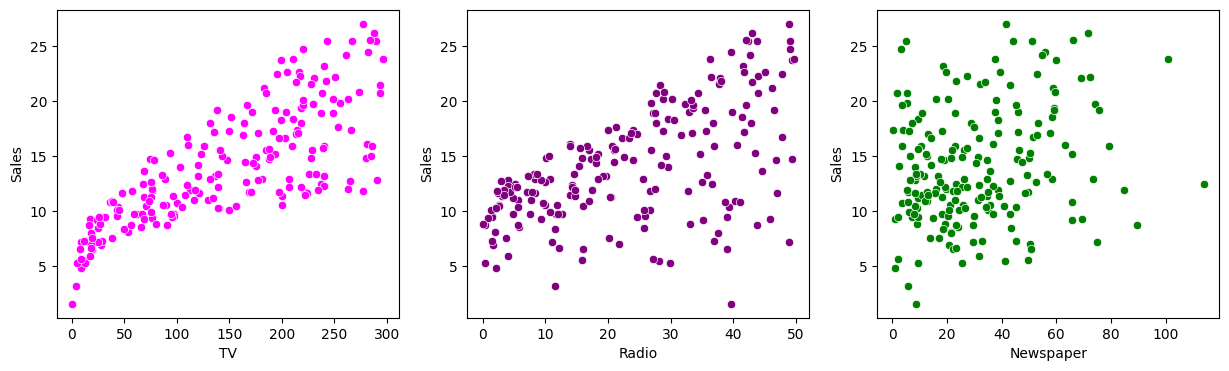

In [22]:
columns=['TV', 'Radio', 'Newspaper']
colors=['magenta' , 'purple' , 'green']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.scatterplot(data=df, x=columns[i], y='Sales', color=colors[i])
plt.show()

TV had a linear relation with sale, Radio is not directly linearly related and newspaper is very much scattered

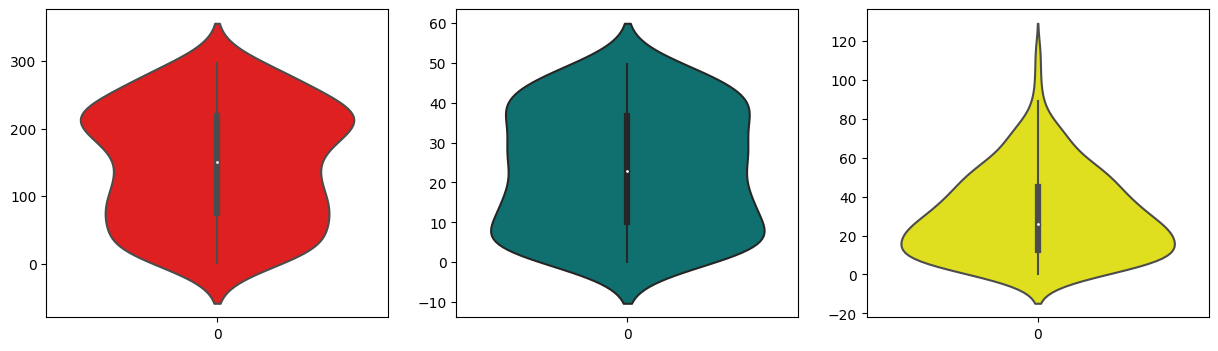

In [26]:
columns=['TV', 'Radio', 'Newspaper']
colors=['red' , 'teal' , 'yellow']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.violinplot(df[columns[i]] , color=colors[i])
plt.show()

<AxesSubplot: >

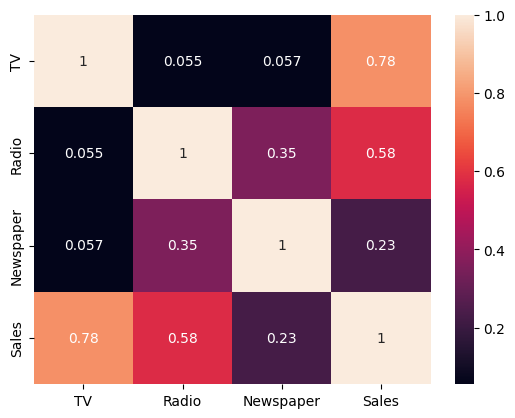

In [27]:
sns.heatmap(df.corr() , annot=True)

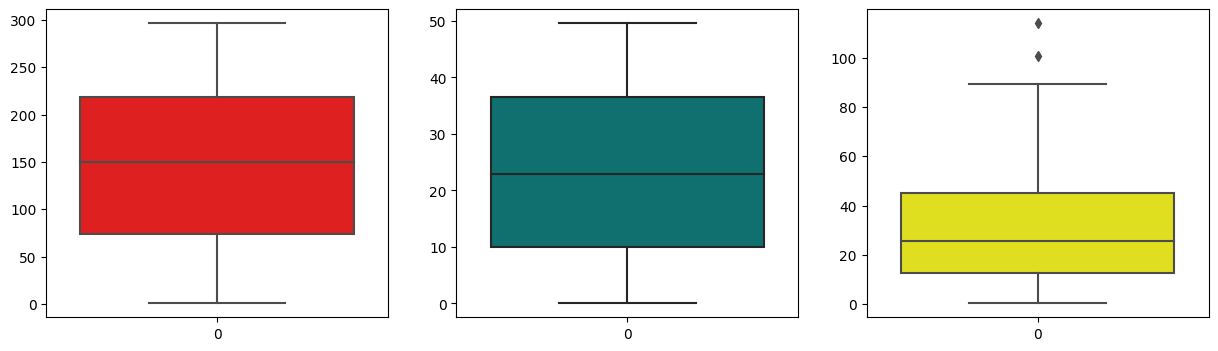

In [29]:
columns=['TV', 'Radio', 'Newspaper']
colors=['red' , 'teal' , 'yellow']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[columns[i]] , color=colors[i])
plt.show()

# Feature Scaling

In [45]:
X=df.drop('Sales' , axis='columns')
y=df.Sales

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df['TV']=scaler.fit_transform(df['TV'].values.reshape(-1,1))
df['Radio']=scaler.fit_transform(df['Radio'].values.reshape(-1,1))
df['Newspaper']=scaler.fit_transform(df['Newspaper'].values.reshape(-1,1))

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2)

plots after feature scaling

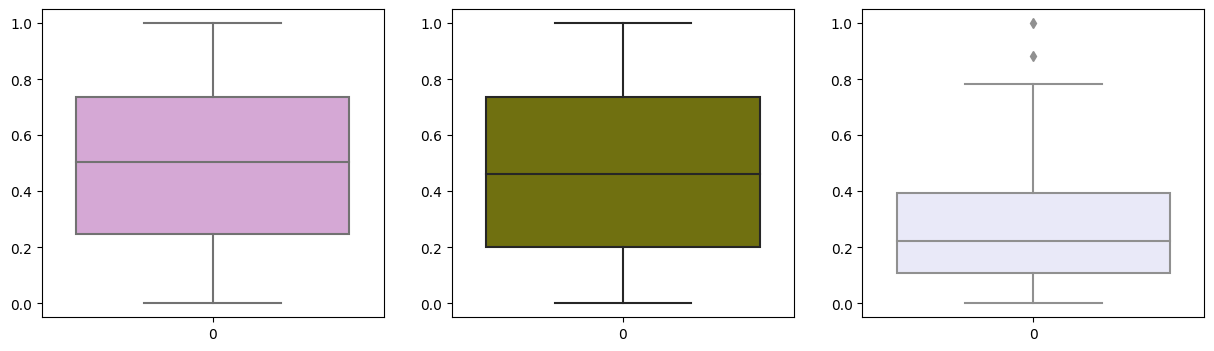

In [48]:
columns=['TV', 'Radio', 'Newspaper']
colors=['plum' , 'olive' , 'lavender']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[columns[i]] , color=colors[i])
plt.show()

# Model : DecisionTressRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Mean Squared Error (MSE), Friedman MSE, Mean Absolute Error (MAE)
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2}


C:\Users\91811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\91811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py

In [51]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [53]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.0267916666666654
R-squared: 0.9524863219587212
